In [70]:
# Imports and import vars
import os
import re
dir = "./outputs/llava_time_trials/"


In [71]:
overall_times = []
overall_average_times = []

for file in os.listdir(dir):
    with open(f"{dir}/{file}", 'r') as f:
        content = f.read()
        #Convert to dictionary
        content = eval(content)
        
    times = []
    average_times = []
    #Some elements are lists. For those are are, grab the second element and store it in a list
    #This is for the case of the llava trials
    for key in content:
        if type(content[key]) == list:
            # For each element in the list, keep iterating until it finds the substring "Time completed:"
            for element in content[key]:
                if "Time completed:" in element:
                    #Now that we are here, only grab the numbers in the string
                    time_to_complete = element.split(" ")[2]
                    average_time = element.split(" ")[4][1:]
                    times.append(time_to_complete)
                    average_times.append(average_time)

    # Calculate a 5 number summary and means of the times and average times
    times = [float(i) for i in times]
    average_times = [float(i) for i in average_times]
    for i in range(len(times)):
        overall_times.append(times[i])
        overall_average_times.append(average_times[i])

    
    times.sort()
    average_times.sort()

    # Time to calculate the 5 number summary and mean
    print(f"File: {file}")
    try:
        min_time = times[0]
        max_time = times[-1]
        q1_time = times[int(len(times)/4)]
        q2_time = times[int(len(times)/2)]
        q3_time = times[int(3*len(times)/4)]
        mean_time = sum(times)/len(times)
        min_avg_time = average_times[0]
        max_avg_time = average_times[-1]
        q1_avg_time = average_times[int(len(average_times)/4)]
        q2_avg_time = average_times[int(len(average_times)/2)]
        q3_avg_time = average_times[int(3*len(average_times)/4)]
        mean_avg_time = sum(average_times)/len(average_times)
        print(f"Times: [{min_time}, {q1_time}, {q2_time}, {q3_time}, {max_time}] ({mean_time:.3f})")
        print(f"Average Times (seconds per image): [{min_avg_time}, {q1_avg_time}, {q2_avg_time}, {q3_avg_time}, {max_avg_time}] ({mean_avg_time:.3f})")
    except IndexError:
        print("No times to calculate")
        print("No average times to calculate")
    print("\n\n")

#Full 5 number summary and mean
overall_times.sort()
overall_average_times.sort()
print("Overall Times")
try:
    min_time = overall_times[0]
    max_time = overall_times[-1]
    q1_time = overall_times[int(len(overall_times)/4)]
    q2_time = overall_times[int(len(overall_times)/2)]
    q3_time = overall_times[int(3*len(overall_times)/4)]
    mean_time = sum(overall_times)/len(overall_times)
    min_avg_time = overall_average_times[0]
    max_avg_time = overall_average_times[-1]
    q1_avg_time = overall_average_times[int(len(overall_average_times)/4)]
    q2_avg_time = overall_average_times[int(len(overall_average_times)/2)]
    q3_avg_time = overall_average_times[int(3*len(overall_average_times)/4)]
    mean_avg_time = sum(overall_average_times)/len(overall_average_times)
    print(f"Times: [{min_time}, {q1_time}, {q2_time}, {q3_time}, {max_time}] ({mean_time:.3f})")
    print(f"Average Times (seconds per image): [{min_avg_time}, {q1_avg_time}, {q2_avg_time}, {q3_avg_time}, {max_avg_time}] ({mean_avg_time:.3f})")
except IndexError:
    print("No times to calculate")
    print("No average times to calculate")

File: 4bit13b.txt
Times: [24.230404, 24.769781, 24.92215, 25.158903, 25.689153] (24.969)
Average Times (seconds per image): [0.206, 1.599, 2.475, 4.143, 12.798] (3.378)



File: 4bit7b.txt
Times: [18.256405, 21.698346, 22.34947, 23.022131, 24.600961] (22.317)
Average Times (seconds per image): [0.194, 1.444, 2.157, 3.723, 11.493] (3.017)



File: 4bitvicuna13b.txt
Times: [26.066203, 26.814702, 27.040004, 27.339121, 60.906967] (28.375)
Average Times (seconds per image): [0.48, 1.798, 2.691, 4.43, 15.732] (3.733)



File: 4bitvicuna7b.txt
Times: [20.868213, 25.847446, 27.81324, 35.019427, 47.972832] (30.276)
Average Times (seconds per image): [0.311, 1.848, 2.641, 5.092, 19.622] (4.101)



File: 8bit13b.txt
Times: [39.301883, 40.201799, 40.575987, 40.99516, 43.737979] (40.666)
Average Times (seconds per image): [0.333, 2.686, 4.002, 6.64, 20.847] (5.508)



File: 8bit7b.txt
Times: [19.604188, 35.619221, 37.803706, 39.070926, 53.288716] (36.227)
Average Times (seconds per image): [0.219, 

In [72]:
import re
import pandas as pd
import warnings

df = pd.DataFrame(columns=["Model", "Load Model Time", "Load Image Time", "Inference Time"])

#suppress all those pesky warnings
warnings.filterwarnings("ignore")


for key in content:
    output = content[key]
    # Convert list to string if necessary
    if isinstance(output, list):
        output = " ".join(output)

    #print(type(output), output)
    try:
        # Find "Time to load model: " and extract the float after it
        load_model_time = re.search(r"Time to load model: (\d+\.\d+)", output).group(1)
        # Find "Time to load image: " and extract the float after it
        load_image_time = re.search(r"Time to load image: (\d+\.\d+)", output).group(1)
        # Find "Time for inference: " and extract the float after it
        inference_time = re.search(r"Time for inference: (\d+\.\d+)", output).group(1)

        #Add to df
        df = df.append({"Model": key, "Load Model Time": load_model_time, "Load Image Time": load_image_time, "Inference Time": inference_time}, ignore_index=True)
    except:
        #No times to calculate
        pass

print(df)

     Model Load Model Time Load Image Time Inference Time
0   000001            8.14            0.00          39.07
1   000002            7.67            0.00          51.16
2   000003            8.05            0.00          32.79
3   000004            7.54            0.00          36.00
4   000005            7.66            0.00          33.32
..     ...             ...             ...            ...
95  000096            7.43            0.00          73.31
96  000097            7.56            0.00          31.67
97  000098            7.46            0.00          30.33
98  000099            7.41            0.00          31.83
99  000100            7.42            0.00          57.69

[100 rows x 4 columns]


In [73]:
#Grab some stats from df

average_load_model_time = df["Load Model Time"].astype(float).mean()
average_load_image_time = df["Load Image Time"].astype(float).mean()
average_inference_time = df["Inference Time"].astype(float).mean()

print(f"Average Load Model Time: {average_load_model_time:.2f}s")
print(f"Average Load Image Time: {average_load_image_time:.2f}s")
print(f"Average Inference Time: {average_inference_time:.2f}s")

total_time_avg = sum(times) / len(times)
print(f"Average Time for everything else: {(total_time_avg-(average_load_model_time + average_load_image_time + average_inference_time)):.2f}s")

print(f"Average Total Time: {total_time_avg:.2f}s")

Average Load Model Time: 7.60s
Average Load Image Time: 0.00s
Average Inference Time: 46.52s
Average Time for everything else: 5.22s
Average Total Time: 59.34s


In [74]:
def grab_times(content: str):
    df = pd.DataFrame(columns=["Model", "Load Model Time", "Load Image Time", "Inference Time"])

    #suppress all those pesky warnings
    warnings.filterwarnings("ignore")


    for key in content:
        output = content[key]
        # Convert list to string if necessary
        if isinstance(output, list):
            output = " ".join(output)

        #print(type(output), output)
        try:
            # Find "Time to load model: " and extract the float after it
            load_model_time = re.search(r"Time to load model: (\d+\.\d+)", output).group(1)
            # Find "Time to load image: " and extract the float after it
            load_image_time = re.search(r"Time to load image: (\d+\.\d+)", output).group(1)
            # Find "Time for inference: " and extract the float after it
            inference_time = re.search(r"Time for inference: (\d+\.\d+)", output).group(1)

            #Add to df
            df = df.append({"Model": key, "Load Model Time": load_model_time, "Load Image Time": load_image_time, "Inference Time": inference_time}, ignore_index=True)
        except:
            #No times to calculate
            pass

    average_load_model_time = df["Load Model Time"].astype(float).mean()
    average_load_image_time = df["Load Image Time"].astype(float).mean()
    average_inference_time = df["Inference Time"].astype(float).mean()

    print(f"Average Load Model Time: {average_load_model_time:.2f}s")
    print(f"Average Load Image Time: {average_load_image_time:.2f}s")
    print(f"Average Inference Time: {average_inference_time:.2f}s")

    total_time_avg = sum(times) / len(times)
    print(f"Average Time for everything else: {(total_time_avg-(average_load_model_time + average_load_image_time + average_inference_time)):.2f}s")

    print(f"Average Total Time: {total_time_avg:.2f}s")

    return average_load_model_time, average_load_image_time, average_inference_time, (total_time_avg-(average_load_model_time + average_load_image_time + average_inference_time)), total_time_avg


In [75]:
df = pd.DataFrame(columns=["Trial Name", "Average Load Model Time", "Average Load Image Time", "Average Inference Time", "Average Other Time" "Average Total Time"])

for file in os.listdir(dir):
    with open(f"{dir}/{file}", 'r') as f:
        content = f.read()
        #Convert to dictionary
        content = eval(content)
    average_load_model_time, average_load_image_time, average_inference_time, average_other_time, total_time_avg = grab_times(content)
    df = df.append({"Trial Name": file[:-4], "Average Load Model Time": average_load_model_time, "Average Load Image Time": average_load_image_time, "Average Inference Time": average_inference_time, "Average Other Time": average_other_time, "Average Total Time": total_time_avg}, ignore_index=True)

print(df)

Average Load Model Time: 10.64s
Average Load Image Time: 0.00s
Average Inference Time: 9.18s
Average Time for everything else: 39.51s
Average Total Time: 59.34s
Average Load Model Time: 6.97s
Average Load Image Time: 0.00s
Average Inference Time: 10.13s
Average Time for everything else: 42.24s
Average Total Time: 59.34s
Average Load Model Time: 11.75s
Average Load Image Time: 0.00s
Average Inference Time: 11.42s
Average Time for everything else: 36.17s
Average Total Time: 59.34s
Average Load Model Time: 7.83s
Average Load Image Time: 0.00s
Average Inference Time: 17.39s
Average Time for everything else: 34.11s
Average Total Time: 59.34s
Average Load Model Time: 10.54s
Average Load Image Time: 0.00s
Average Inference Time: 24.97s
Average Time for everything else: 23.83s
Average Total Time: 59.34s
Average Load Model Time: 6.85s
Average Load Image Time: 0.00s
Average Inference Time: 24.22s
Average Time for everything else: 28.26s
Average Total Time: 59.34s
Average Load Model Time: 11.53s


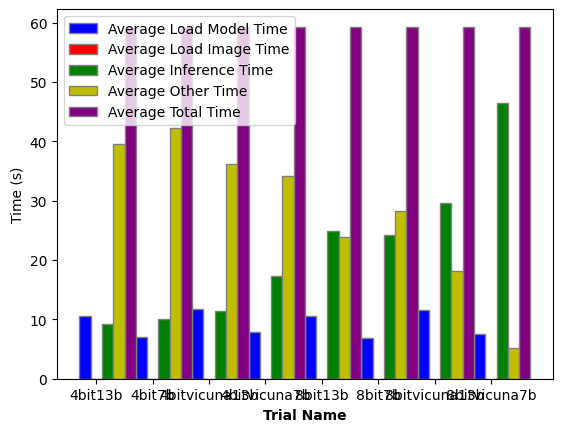

In [76]:
# Plot bar graph -- each bar is a trial name, and each trial name has 4 bars: average load model time, average load image time, average inference time, and average total time

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

barWidth = 0.2

r1 = df.index

plt.bar(r1, df["Average Load Model Time"], color='b', width=barWidth, edgecolor='grey', label='Average Load Model Time')

r2 = [x + barWidth for x in r1]

plt.bar(r2, df["Average Load Image Time"], color='r', width=barWidth, edgecolor='grey', label='Average Load Image Time')

r3 = [x + barWidth for x in r2]

plt.bar(r3, df["Average Inference Time"], color='g', width=barWidth, edgecolor='grey', label='Average Inference Time')

r4 = [x + barWidth for x in r3]

plt.bar(r4, df["Average Other Time"], color='y', width=barWidth, edgecolor='grey', label='Average Other Time')

r5 = [x + barWidth for x in r4]

plt.bar(r5, df["Average Total Time"], color='purple', width=barWidth, edgecolor='grey', label='Average Total Time')

plt.xlabel('Trial Name', fontweight='bold')

plt.xticks([r + barWidth for r in range(len(df.index))], df["Trial Name"])

plt.legend()

plt.ylabel('Time (s)')


plt.show()


In [79]:
df

,Trial Name,Average Load Model Time,Average Load Image Time,Average Inference Time,Average Other TimeAverage Total Time,Average Other Time,Average Total Time
0,4bit13b,10.640200,0.0,9.180800,NaN,39.514597,59.335597
1,4bit7b,6.966200,0.0,10.127300,NaN,42.242097,59.335597
2,4bitvicuna13b,11.751300,0.0,11.418900,NaN,36.165397,59.335597
3,4bitvicuna7b,7.833763,0.0,17.394731,NaN,34.107103,59.335597
4,8bit13b,10.539000,0.0,24.965900,NaN,23.830697,59.335597
5,8bit7b,6.849600,0.0,24.221300,NaN,28.264697,59.335597
6,8bitvicuna13b,11.525300,0.0,29.582400,NaN,18.227897,59.335597
7,8bitvicuna7b,7.596100,0.0,46.522700,NaN,5.216797,59.335597


In [80]:
#remove the column "Trial Name" and save to csv
df = df.drop(columns=["Average Other TimeAverage Total Time"])
df.to_csv("llava_time_trials.csv", index=False)